### CAMBLateDE - Sum of Hyperbolic Tangent
Diogo H. F. Souza, September 20 2024

In [1]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /gpfs/projects/MirandaGroup/Diogo/CAMBLateDE/camb


In [2]:
zs_5bins = [0.3*(1+i) for i in range(5)]

commom_params = {"H0": 70, "ombh2":0.02238280, "omch2":0.1201075, "TCMB": 2.7255,
                 "dark_energy_model": 'ppf',
                  "w0": -0.8, "w1": -0.4, "w2": -0.2, "w3": -0.7, "w4": -0.9,
                  "z1":zs_5bins[0], "z2":zs_5bins[1], "z3":zs_5bins[2], "z4":zs_5bins[3], "z5":zs_5bins[4],
                 # Neutrinos
                  "omnuh2": 0, "num_nu_massless": 3.044, "num_nu_massive": 0,
                  "nu_mass_degeneracies": [0], "nu_mass_numbers": [0],
                 # Initial Power Spectrum
                  "As": 2.100549e-09, "ns": 0.9660499, 
                  "YHe": 0.246, "WantTransfer": True}


Binned5_params = camb.set_params(**commom_params, DEmodel= 5)
SumTanh_params = camb.set_params(**commom_params, DEmodel= 20, sigma=0.05)

In [3]:
scale_factor = np.logspace(-6, 0, 5000)
redshift = 1/scale_factor - 1

Binned5_results = camb.get_results(Binned5_params)
SumTanh_results = camb.get_results(SumTanh_params)
rho_Binned5, w_Binned5 = Binned5_results.get_dark_energy_rho_w(scale_factor)
rho_SumTanh, w_SumTanh = SumTanh_results.get_dark_energy_rho_w(scale_factor)

In [66]:
x = [0]+[eval(f"Binned5_results.Params.DarkEnergy.z{i+1}") for i in range(5)] + [10] # 10 is arbitrary - just choose a high redshift to support w = -1
y = [eval(f"Binned5_results.Params.DarkEnergy.w{i}") for i in range(5)] + [-1]    

(0.1, 10.0)

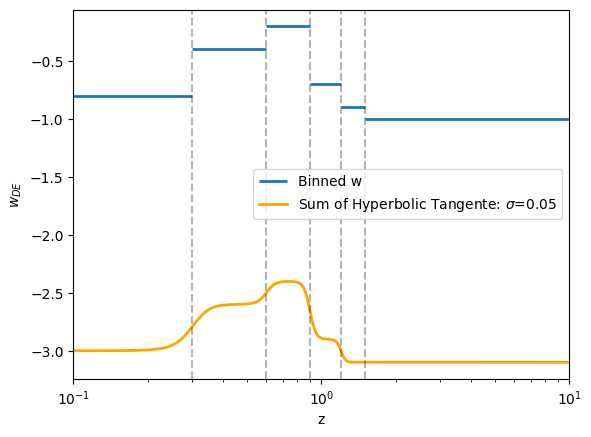

In [73]:
[plt.hlines(y=y[i],xmin=x[i],xmax=x[i+1],color="C0",lw=2, label=("Binned w" if i==0 else None)) for i in range(6)]
plt.semilogx(redshift,w_SumTanh, lw=2, label="Sum of Hyperbolic Tangente: "+r"$\sigma$={}".format(SumTanh_results.Params.DarkEnergy.sigma),color="orange")

[plt.axvline(x=zs_5bins[i],c="black",ls="--",alpha=.3) for i in range(5)]
plt.legend(loc="center right")
plt.xlabel("z")
plt.ylabel(r"$w_{DE}$")
plt.xlim(1e-1,1e1)